# Analysis of the Probability of Randomisation

## 2x10^4 iterations of 10^2 step runs
These results should show the variance in shorter runs. If the model is good, these results will be comparable to
empirical traffic data.

A p_randomisation of 0.5 is being used as the value does not affect the overall behaviour, just the
frequency and speeds at which the behaviour can first be observed.

SETUP:

In [ ]:
from model import NaSchTraffic
from mesa.batchrunner import BatchRunner

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MultipleLocator
from numpy.random import default_rng

rng = default_rng()

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 300

generate_new = False
load_file = "data/large_df_" + "20-04-2021" + ".pkl"

In [2]:
if generate_new:
    def get_average_speed(model):
        """
        Find the average speed of all the agents over the steps after equilibrium is reached.
        """
        selected_speeds = model.speed_averages[200:]
    
        return sum(selected_speeds) / len(selected_speeds)
    
    def get_average_density(model):
        """
        Find the average density of all the agents over the steps after equilibrium is reached.
        """
        selected_densities = model.densities[200:]
    
        return sum(selected_densities) / len(selected_densities)
    
    def get_average_flow(model):
        """
        Find the average flow of all the agents over the steps after equilibrium is reached.
        """
        selected_flows = model.flows[200:]
    
        return float(sum(selected_flows)) / len(selected_flows)
    
    model_reporters_large={
        "Averaged_Speed": get_average_speed,
        "Averaged_Density": get_average_density,
        "Averaged_Flow": get_average_flow,
    }
    
    density_distro = rng.beta(1.5, 4, 2500)
    
    fixed_params_large = {"height": 1, "width": 600, "general_max_speed": 5, "p_randomisation": 0.5}
    variable_params_large = { "vehicle_density": density_distro}
    
    param_sweep_large = BatchRunner(NaSchTraffic,
                              variable_parameters=variable_params_large, fixed_parameters=fixed_params_large,
                              iterations=4,
                              max_steps=700,
                              model_reporters=model_reporters_large,
                              display_progress=True)
    
    param_sweep_large.run_all()

Dataframe:

In [8]:
if generate_new:
    df_large = param_sweep_large.get_model_vars_dataframe()
    
    # SAVE TO FILE
    time_str = time.strftime("%y%m%d_%H%M")
    df_large.to_pickle("data/large_df_" + time_str + ".pkl")
else:
    # LOAD FROM FILE
    df_large = pd.read_pickle(load_file)
    
df_large.head()

,vehicle_density,Run,Averaged_Density,Averaged_Flow,Averaged_Speed,height,width,general_max_speed,p_randomisation
0,0.569297,0,0.576822,0.172,0.298217,1,600,5,0.5
1,0.569297,1,0.572394,0.178,0.307097,1,600,5,0.5
2,0.569297,2,0.574033,0.188,0.309527,1,600,5,0.5
3,0.569297,3,0.557689,0.166,0.322397,1,600,5,0.5
4,0.331017,4,0.337139,0.264,0.765041,1,600,5,0.5


Coloured data visualisation:

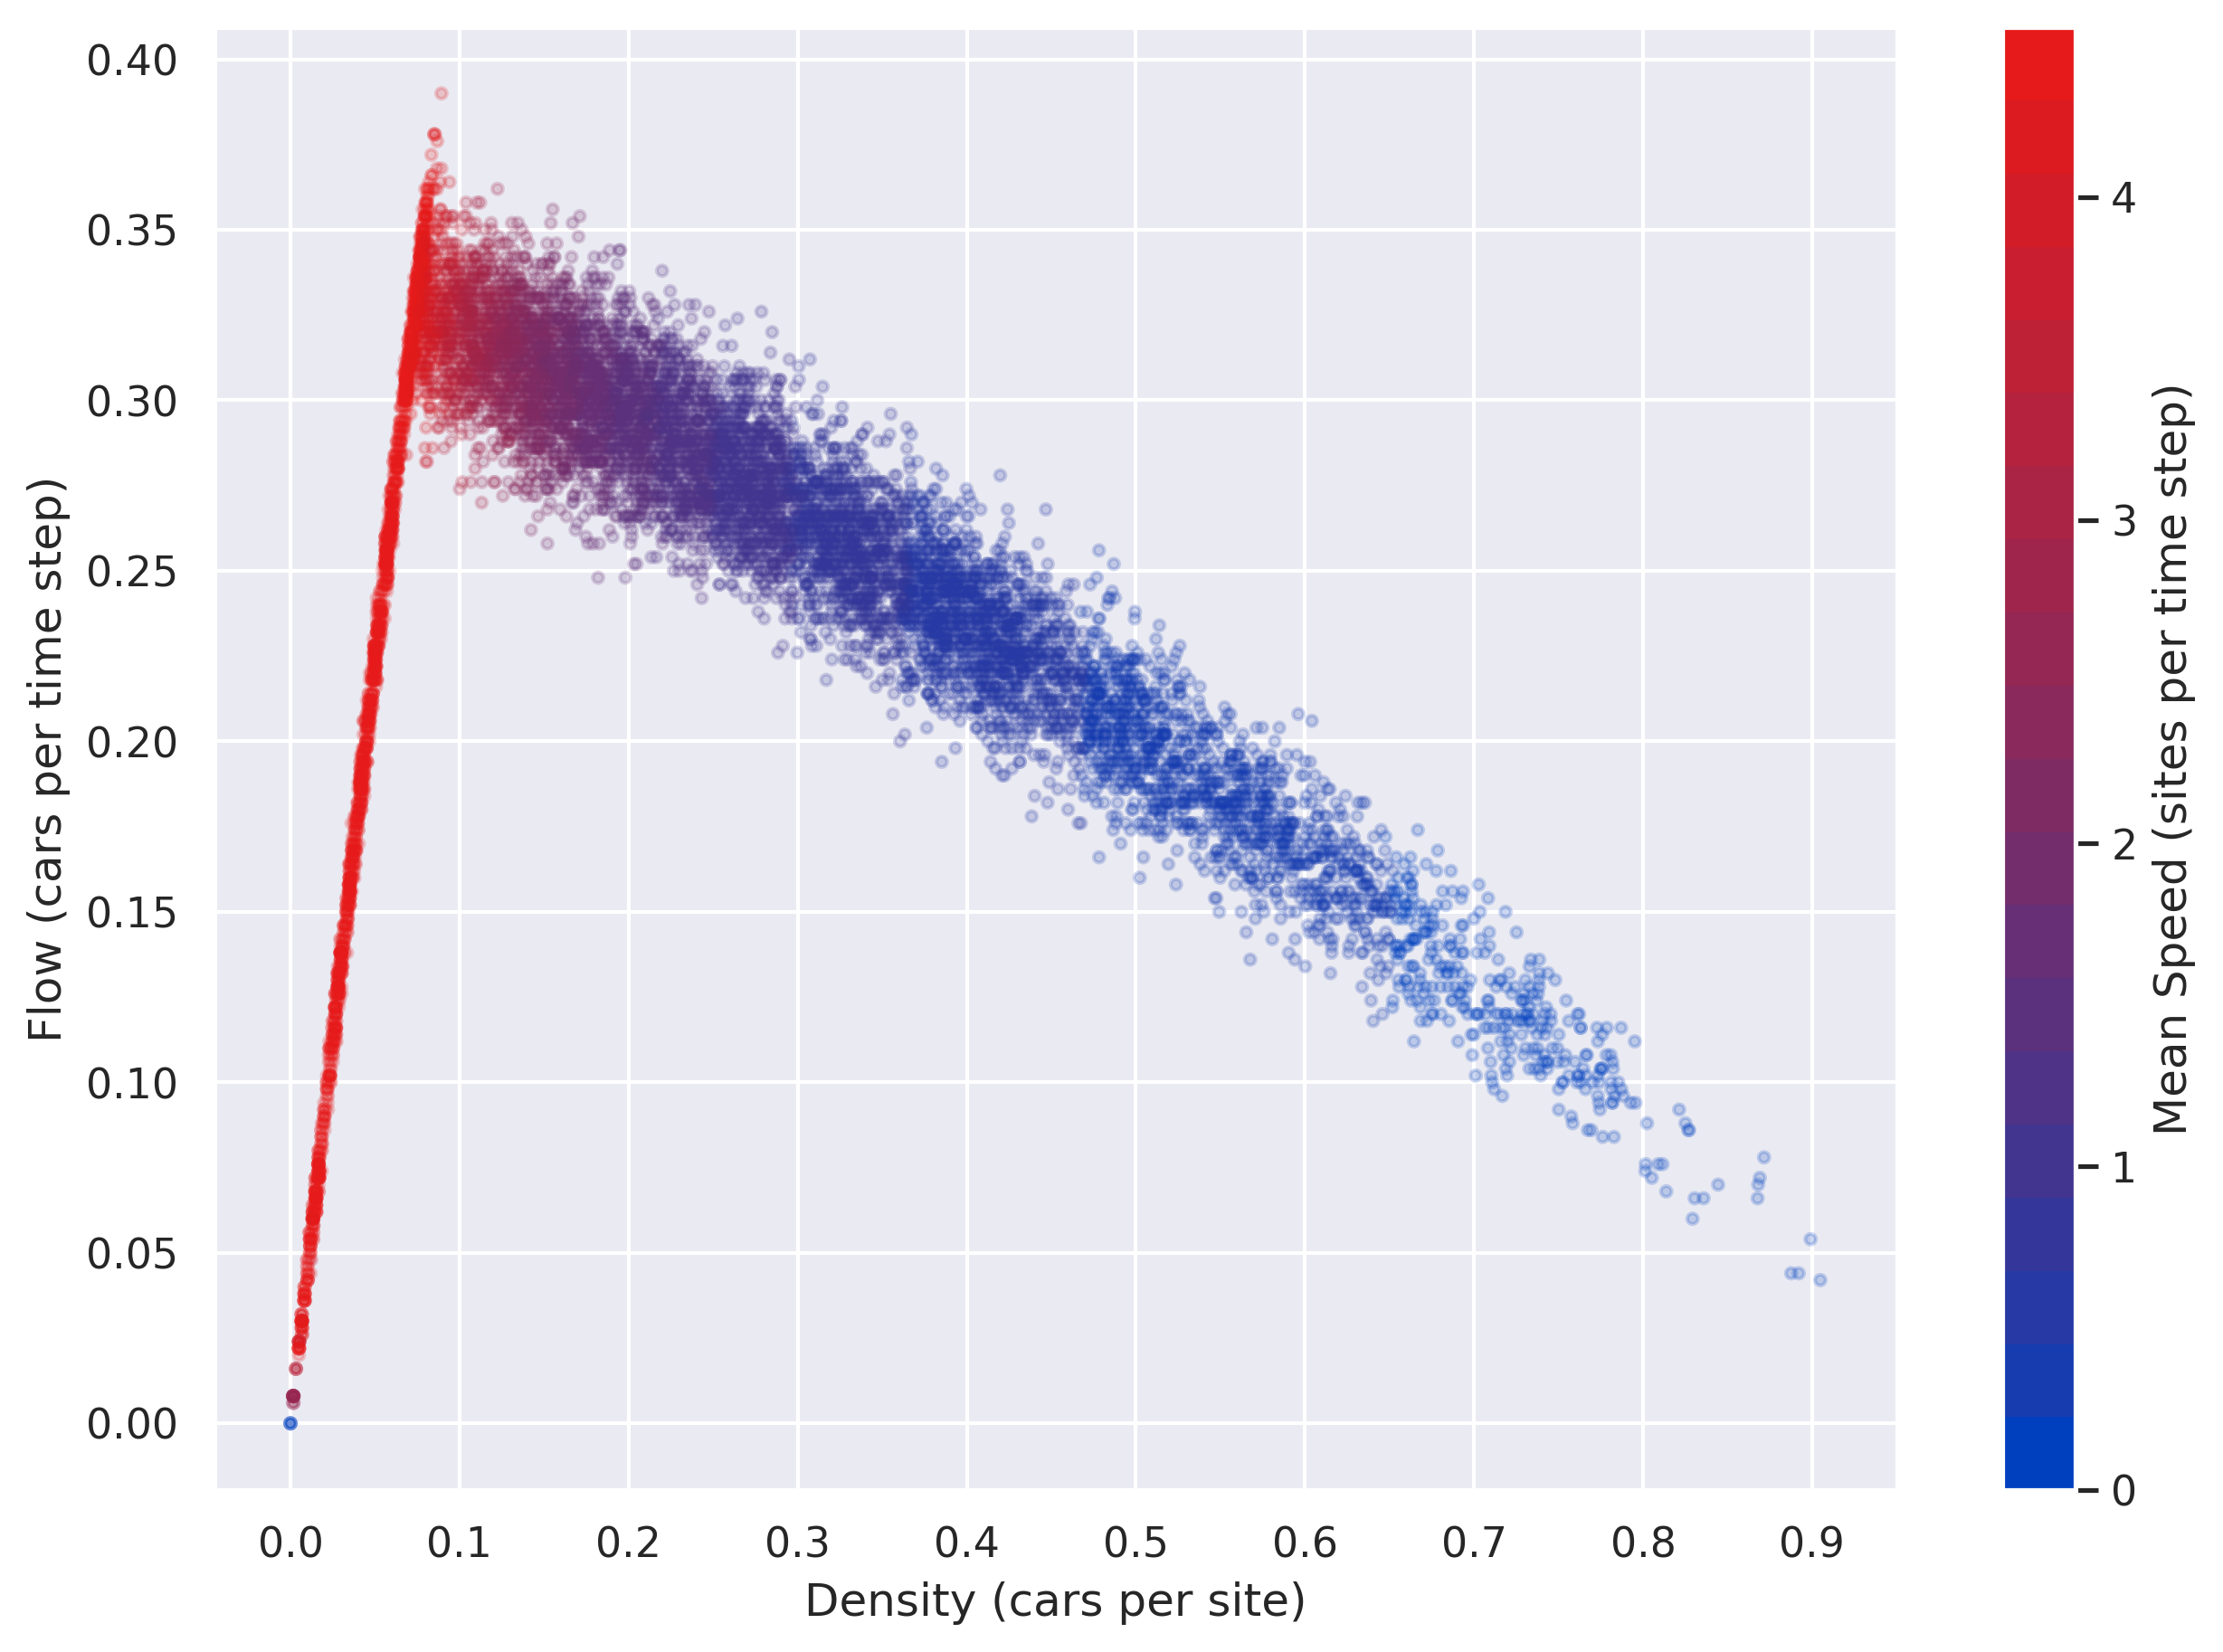

In [59]:
colors = [(0, 0.25, 0.75), (0.9, 0.1, 0.1)] # Experiment with this
cm = LinearSegmentedColormap.from_list('test', colors, N=20, gamma=0.8)

plt.scatter(df_large.Averaged_Density, df_large.Averaged_Flow, c=df_large.Averaged_Speed, cmap=cm, s=8, alpha=0.2)
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.xticks(np.arange(0, 1, step=0.1))
bar = plt.colorbar()
bar.set_label('Mean Speed (sites per time step)')
bar.set_alpha(1)
bar.draw_all()
plt.grid(True)
time_str = time.strftime("%y%m%d_%H%M")
plt.savefig("img/flow_density_20000_color_scatter" + time_str + ".png")
plt.show()

Alternatively using a 2D density plot:

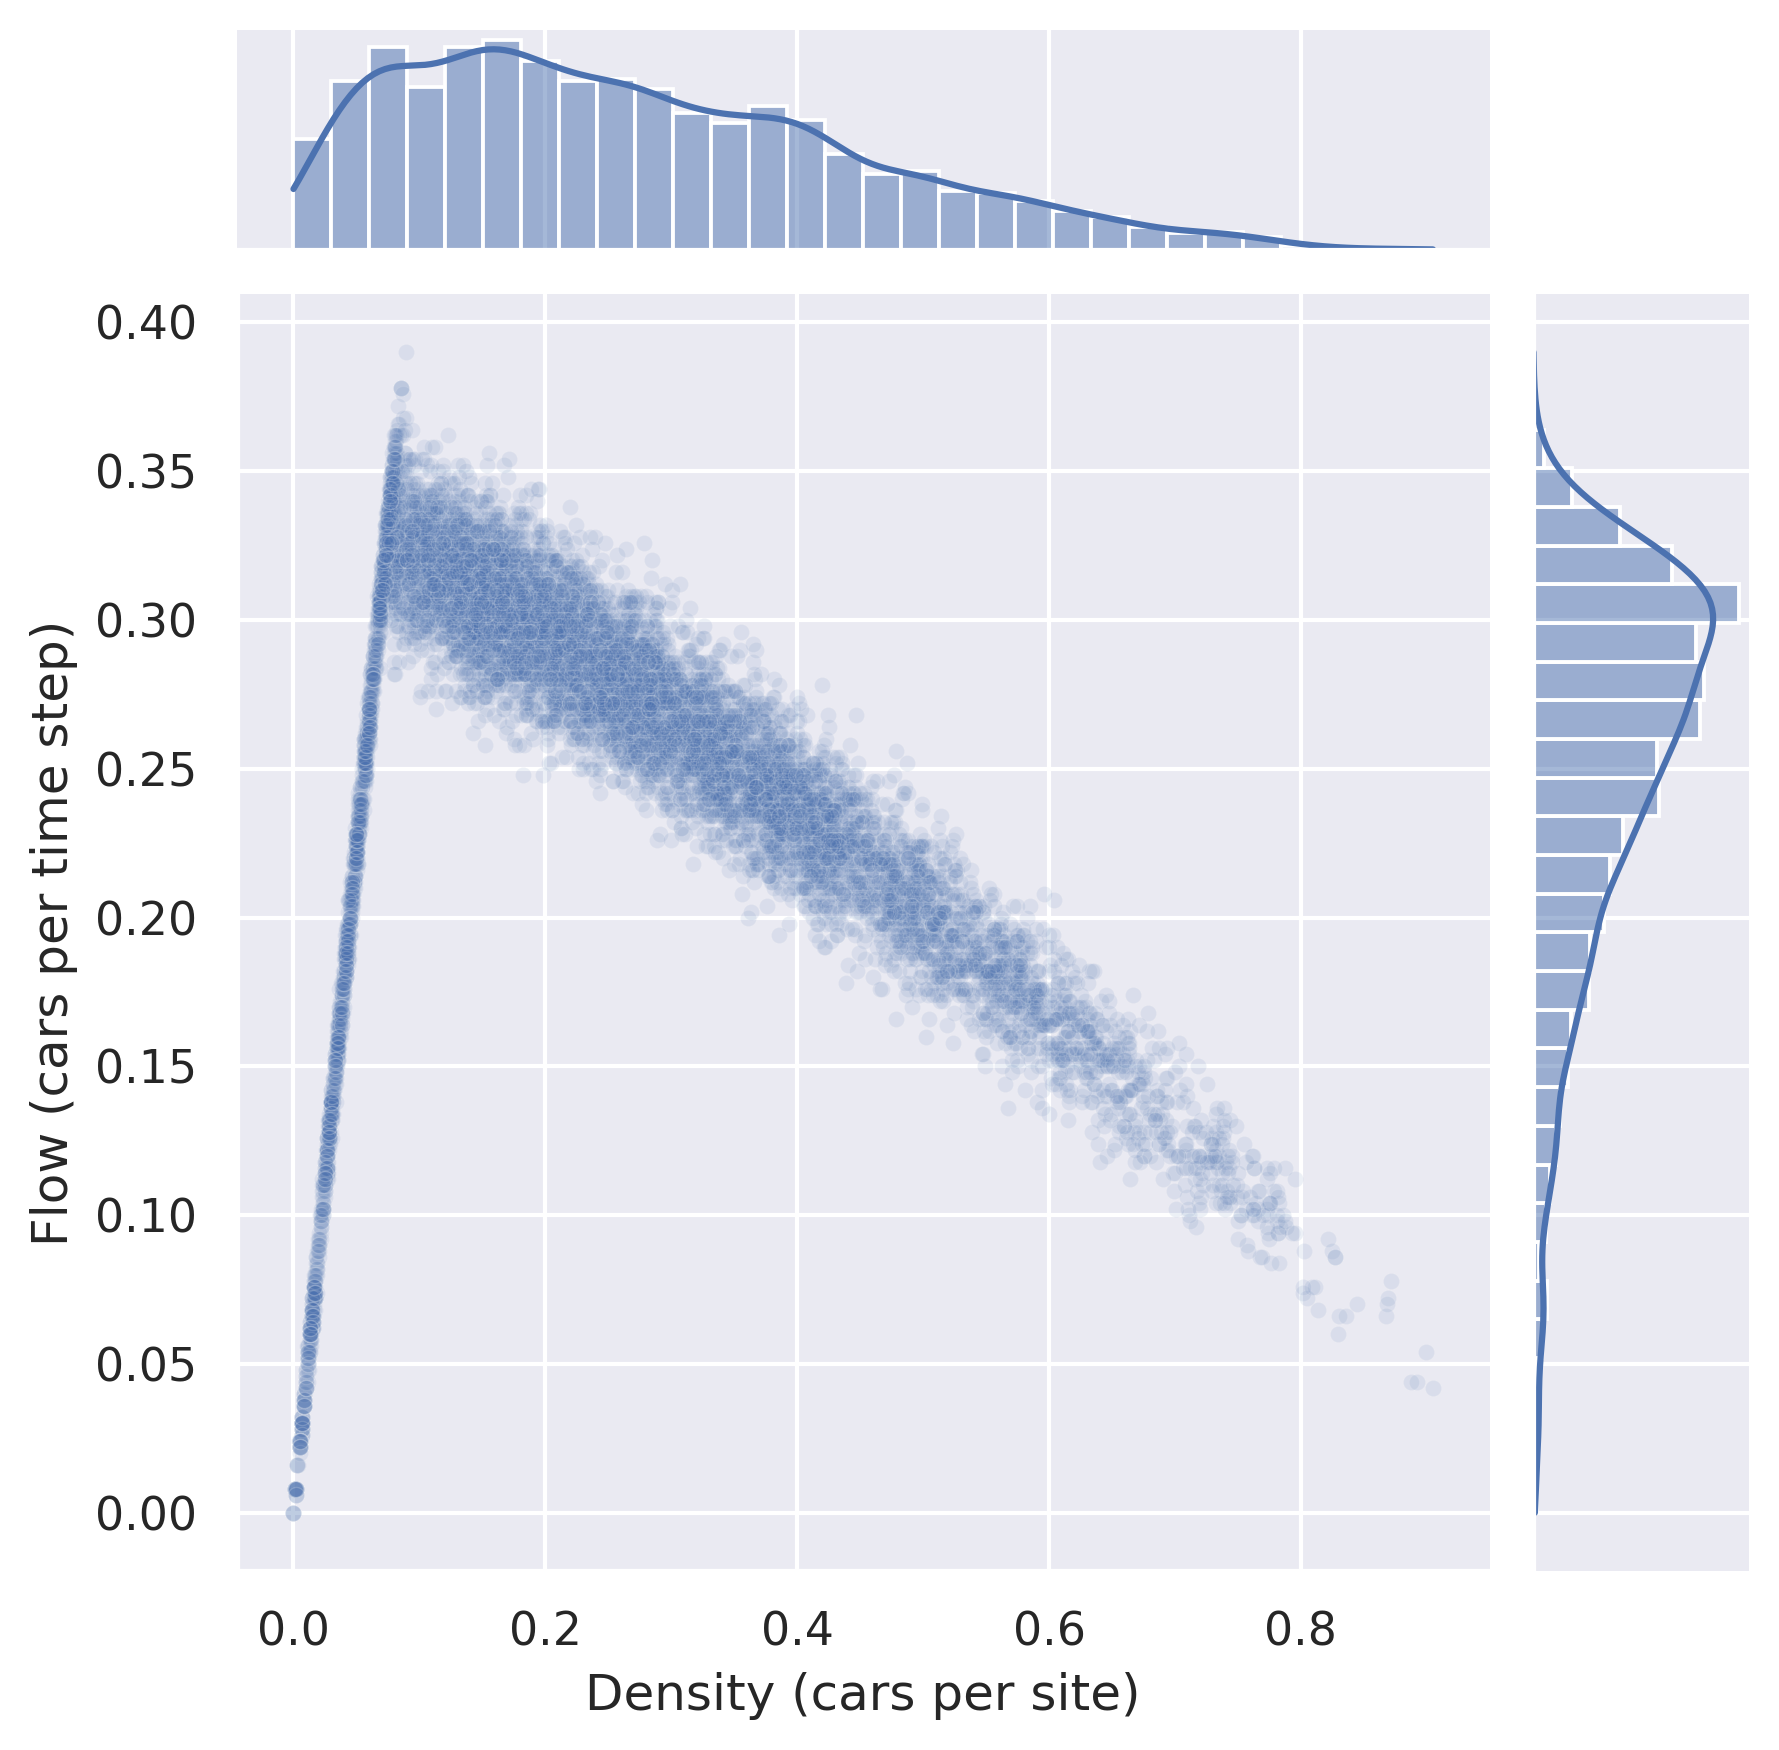

In [61]:
g = sns.JointGrid(data=df_large, x="Averaged_Density", y="Averaged_Flow")
g.plot_joint(sns.scatterplot, alpha=.1, s=15)
g.plot_marginals(sns.histplot, kde=True, bins=30)
g.set_axis_labels(xlabel='Density (cars per site)', ylabel='Flow (cars per time step)')

time_str = time.strftime("%y%m%d_%H%M")
g.savefig("img/flow_density_20000_density" + time_str + ".png")
plt.show()

Speed vs Density

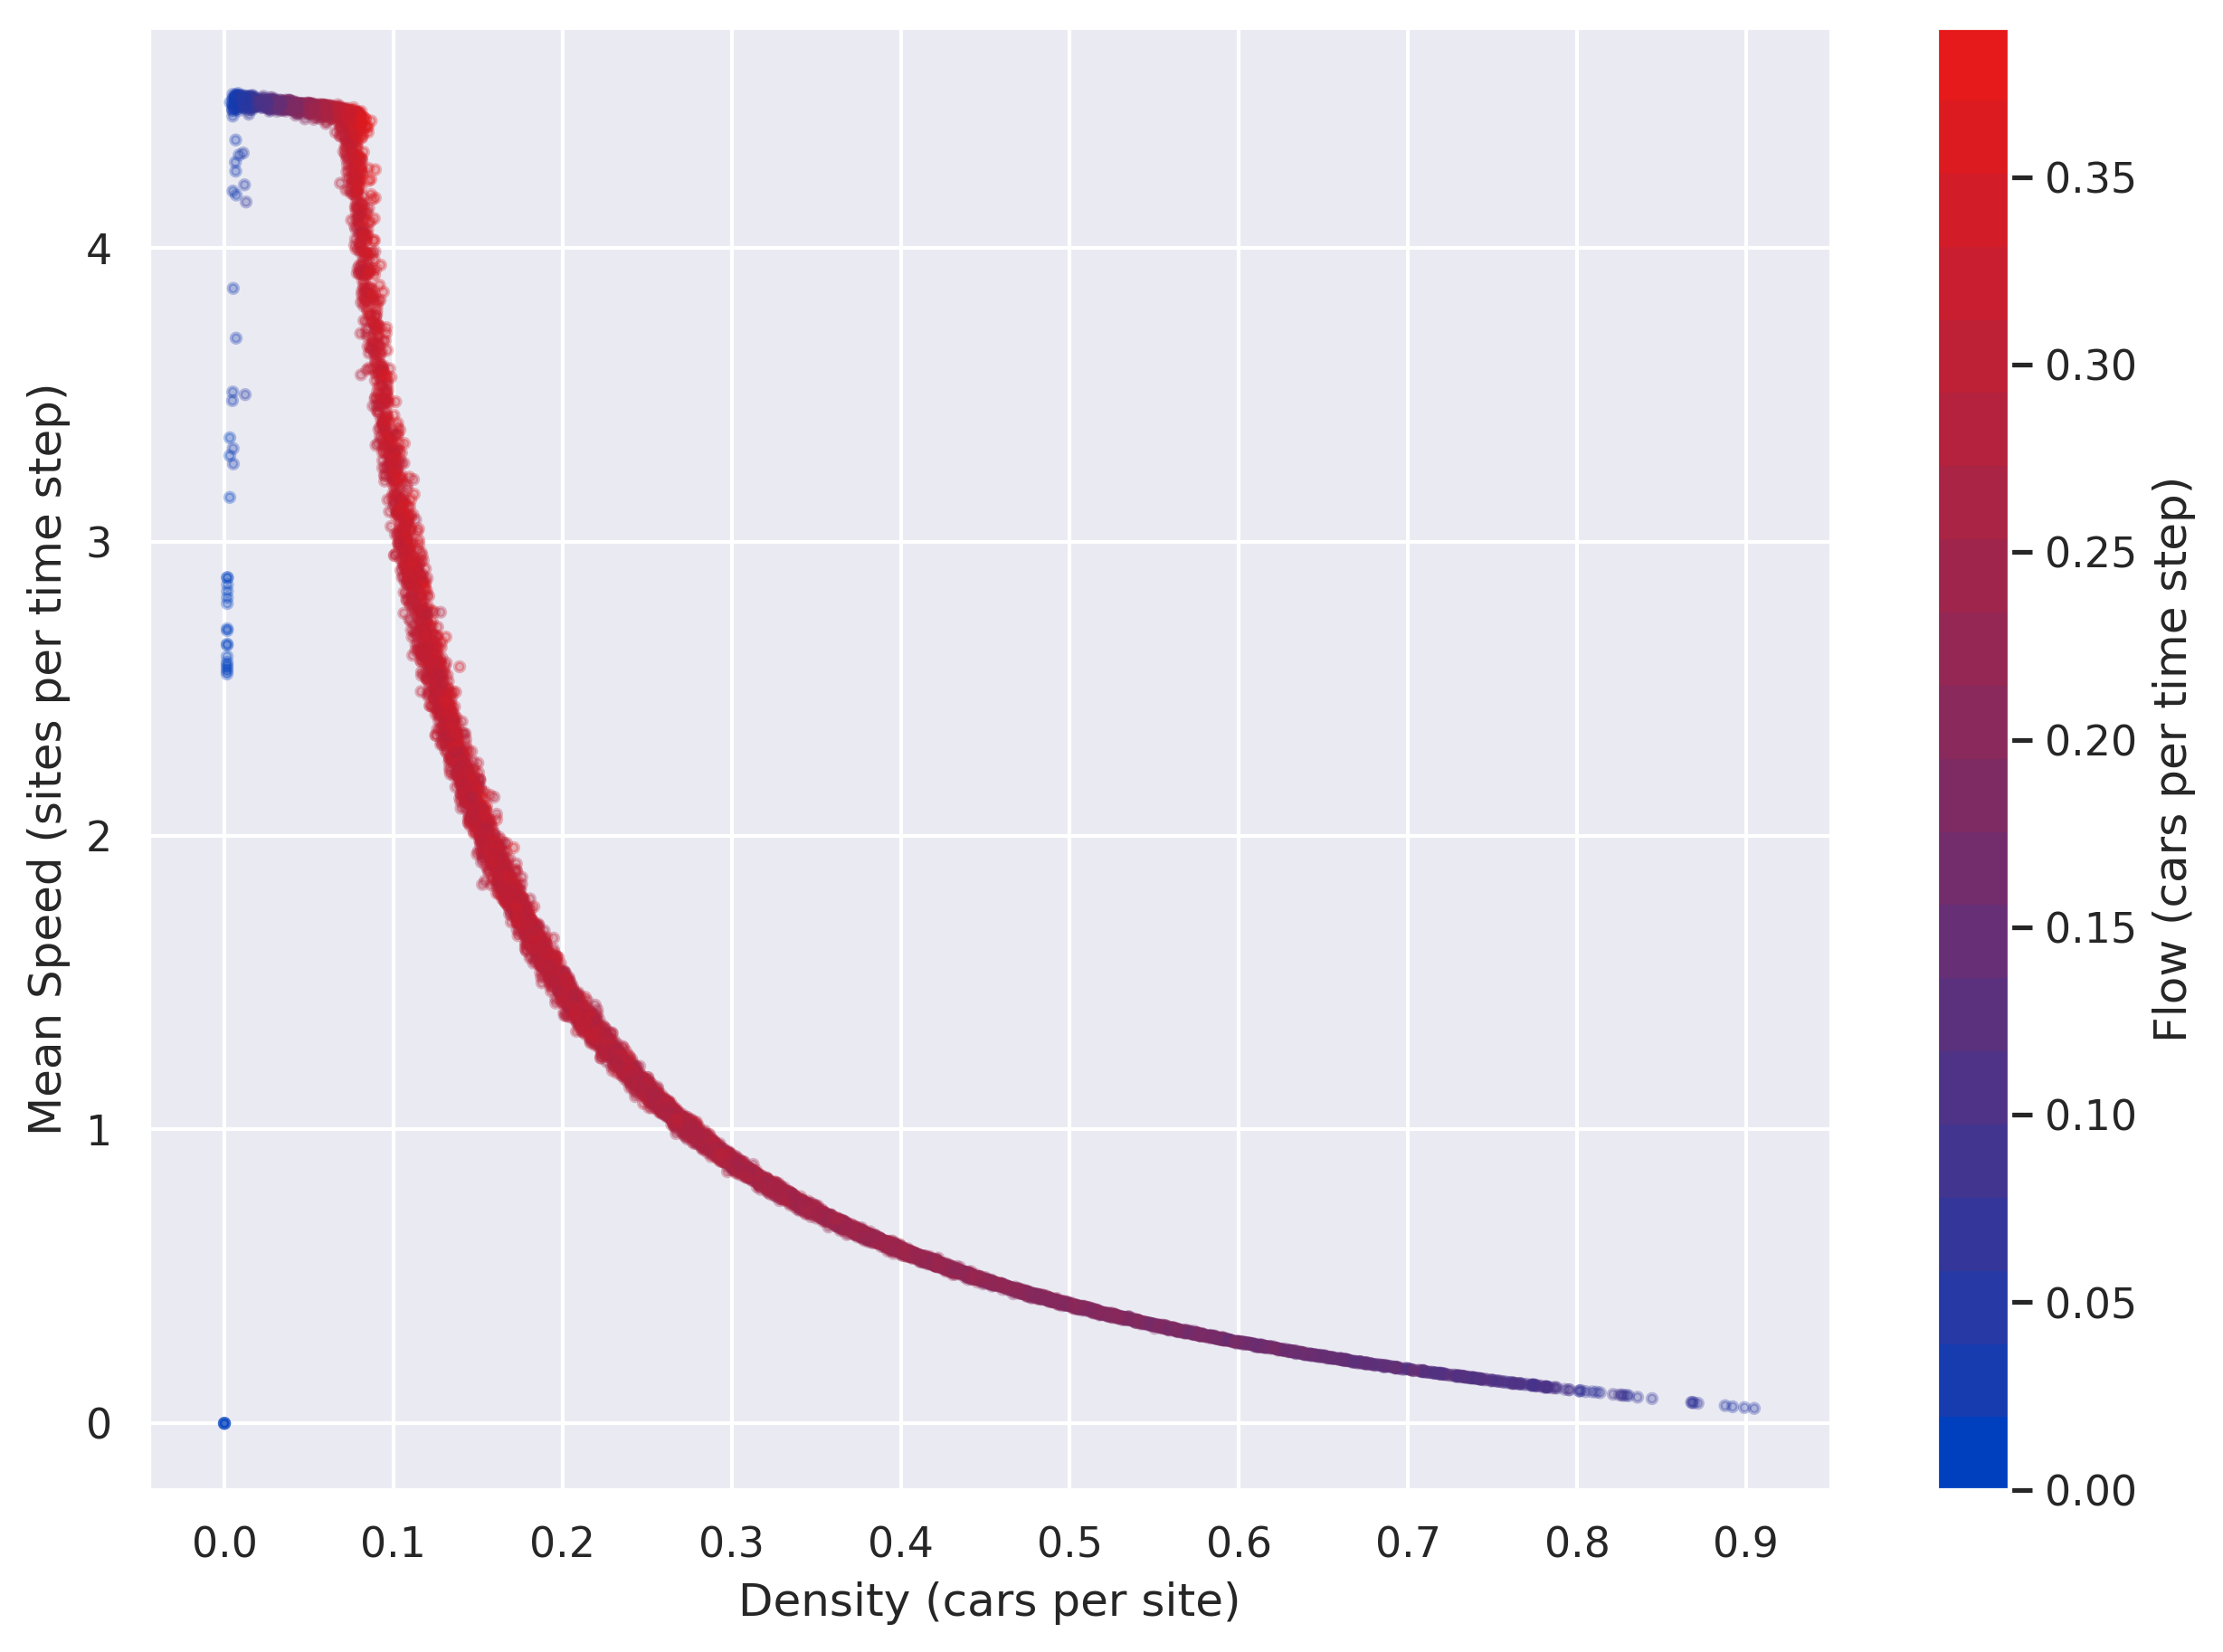

In [62]:
plt.scatter(df_large.Averaged_Density, df_large.Averaged_Speed, c=df_large.Averaged_Flow, cmap=cm, s=6, alpha=0.3)
plt.xlabel('Density (cars per site)')
plt.ylabel('Mean Speed (sites per time step)')
bar = plt.colorbar()
bar.set_label('Flow (cars per time step)')
bar.set_alpha(1)
bar.draw_all()
plt.xticks(np.arange(0, 1, step=0.1))
plt.grid(True)
time_str = time.strftime("%y%m%d_%H%M")
plt.savefig("img/speed_density_20000_color_scatter" + time_str + ".png")
plt.show()

Speed vs Flow

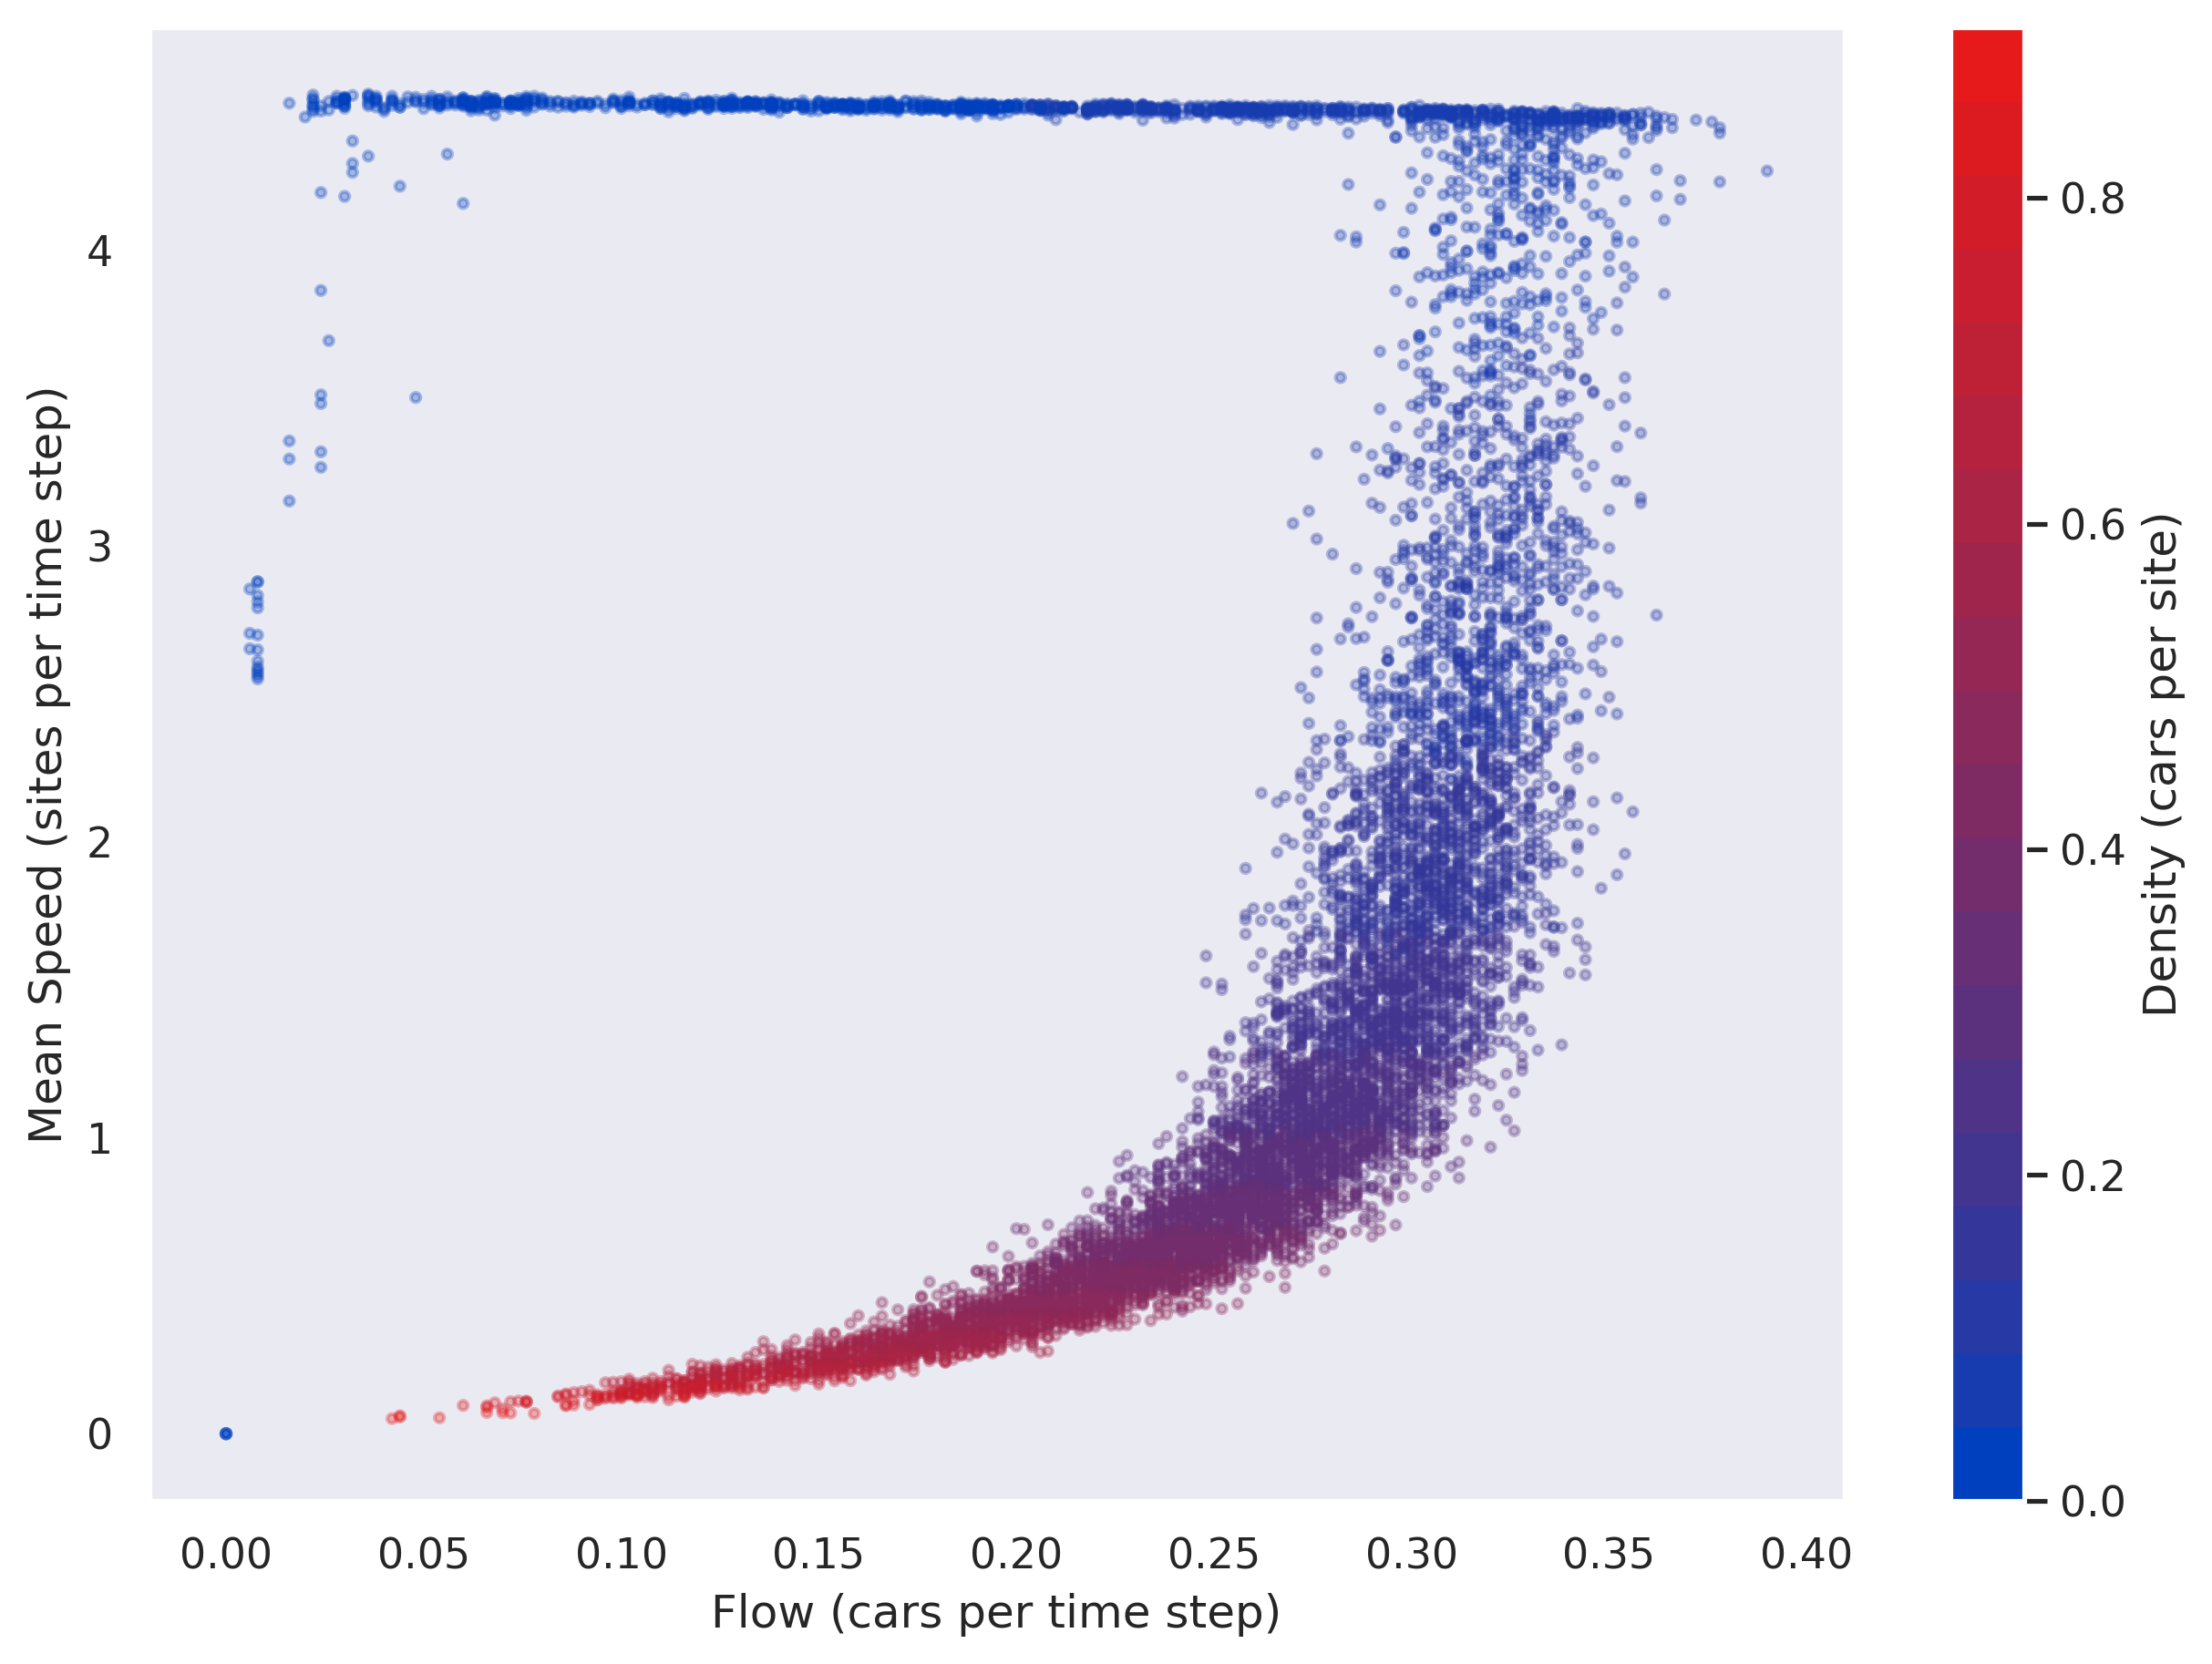

In [67]:
plt.scatter(df_large.Averaged_Flow, df_large.Averaged_Speed, c=df_large.Averaged_Density, cmap=cm, s=6, alpha=0.3)
plt.xlabel('Flow (cars per time step)')
plt.ylabel('Mean Speed (sites per time step)')
bar = plt.colorbar()
bar.set_label('Density (cars per site)')
bar.set_alpha(1)
bar.draw_all()
plt.grid(False)

time_str = time.strftime("%y%m%d_%H%M")
plt.savefig("img/speed_flow_20000_color_scatter" + time_str + ".png")
plt.show()
